# PPO Experiment

### Defining configs and inputs

In [1]:
from PPO.ppo_test import test_ppo_policy

source_model = "trained-models/ppo/ppo_model_trained_on_source.mdl"
target_model = "trained-models/ppo/ppo_model_trained_on_target.mdl"

target_env = "CustomHopper-target-v0"
source_env = "CustomHopper-source-v0"

### Perform Tests

In [2]:
print("SOURCE->SOURCE TEST")
source_source_rewards, source_source_ep_len = test_ppo_policy(
    test_env=source_env, 
    model=source_model
)
mean_source_source_reward = sum(source_source_rewards)/len(source_source_rewards)
mean_source_source_ep_len = sum(source_source_ep_len)/len(source_source_ep_len)
print("Mean Reward source->source: ", mean_source_source_reward)
print("Mean ep lenght source->source: ", mean_source_source_ep_len)

print("SOURCE->TARGET TEST")
source_target_rewards, source_target_ep_len = test_ppo_policy(
    test_env=target_env,
    model=source_model
)
mean_source_target_reward = sum(source_target_rewards)/len(source_target_rewards)
mean_source_target_ep_len = sum(source_target_ep_len)/len(source_target_ep_len)
print("Mean Reward source->target: ", mean_source_target_reward)
print("Mean ep lenght source->target: ", mean_source_target_ep_len)

print("TARGET->TARGET TEST")
target_target_rewards, target_target_ep_len = test_ppo_policy(
    test_env=target_env,
    model=target_model
)
mean_target_target_reward = sum(target_target_rewards)/len(target_target_rewards)
mean_target_target_ep_len = sum(target_target_ep_len)/len(target_target_ep_len)
print("Mean Reward target->target: ", mean_target_target_reward)
print("Mean ep lenght target->target: ", mean_target_target_ep_len)



SOURCE->SOURCE TEST
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Mean Reward source->source:  1485.4595322403518
Mean ep lenght source->source:  435.481
SOURCE->TARGET TEST
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [3.53429174 3.92699082 2.71433605 5.0893801 ]
Mean Reward source->target:  904.3695309058328
Mean ep lenght source->target:  261.794
TARGET->TARGET TEST
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [3.53429174 3.92

### Plot rewards

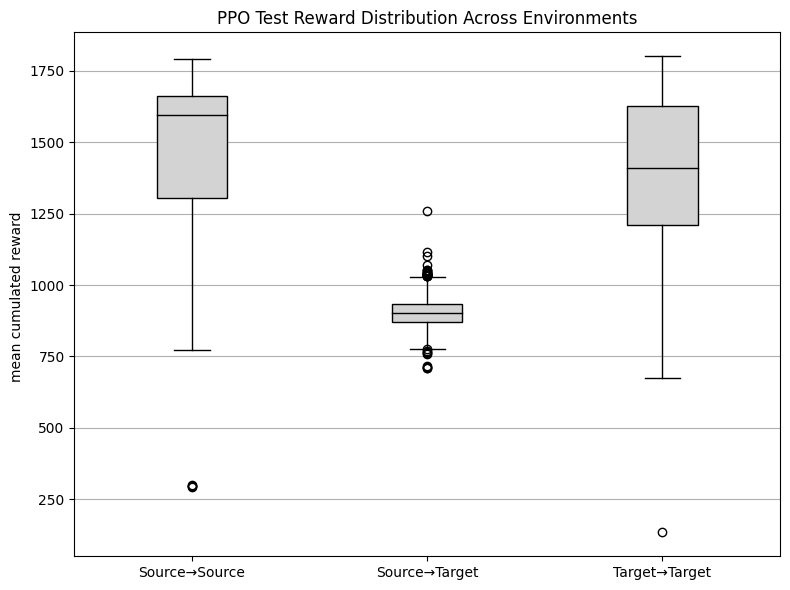

In [3]:
import matplotlib.pyplot as plt

# Each reward array should be a 1D array or list of floats
data = [
    source_source_rewards,
    source_target_rewards,
    target_target_rewards
]

labels = [
    'Source→Source',
    'Source→Target',
    'Target→Target'
]

plt.figure(figsize=(8, 6))

plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightgray'),
            medianprops=dict(color='black'))

plt.ylabel("mean cumulated reward ")
plt.title("PPO Test Reward Distribution Across Environments")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
